# CIFAR10 딥러닝 모델
CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

## 1. 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [3]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

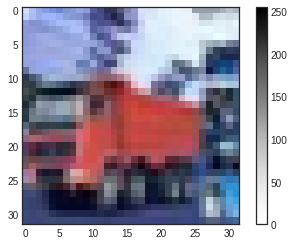

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [6]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
#데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [8]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 2. 모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [9]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()

model.add(layers.Input(shape=(3072, ))) # input layer

units = [2048, 1024, 512, 256, 128]

for i in range(1, 7):
    if i != 6:
        model.add(layers.Dense(units[i-1], name=f'dense_{i}'))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU(alpha=0.01))
        model.add(layers.Dropout(0.4))
    else:
        model.add(layers.Dense(10, activation='softmax', name=f'dense_{i}')) # output layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0

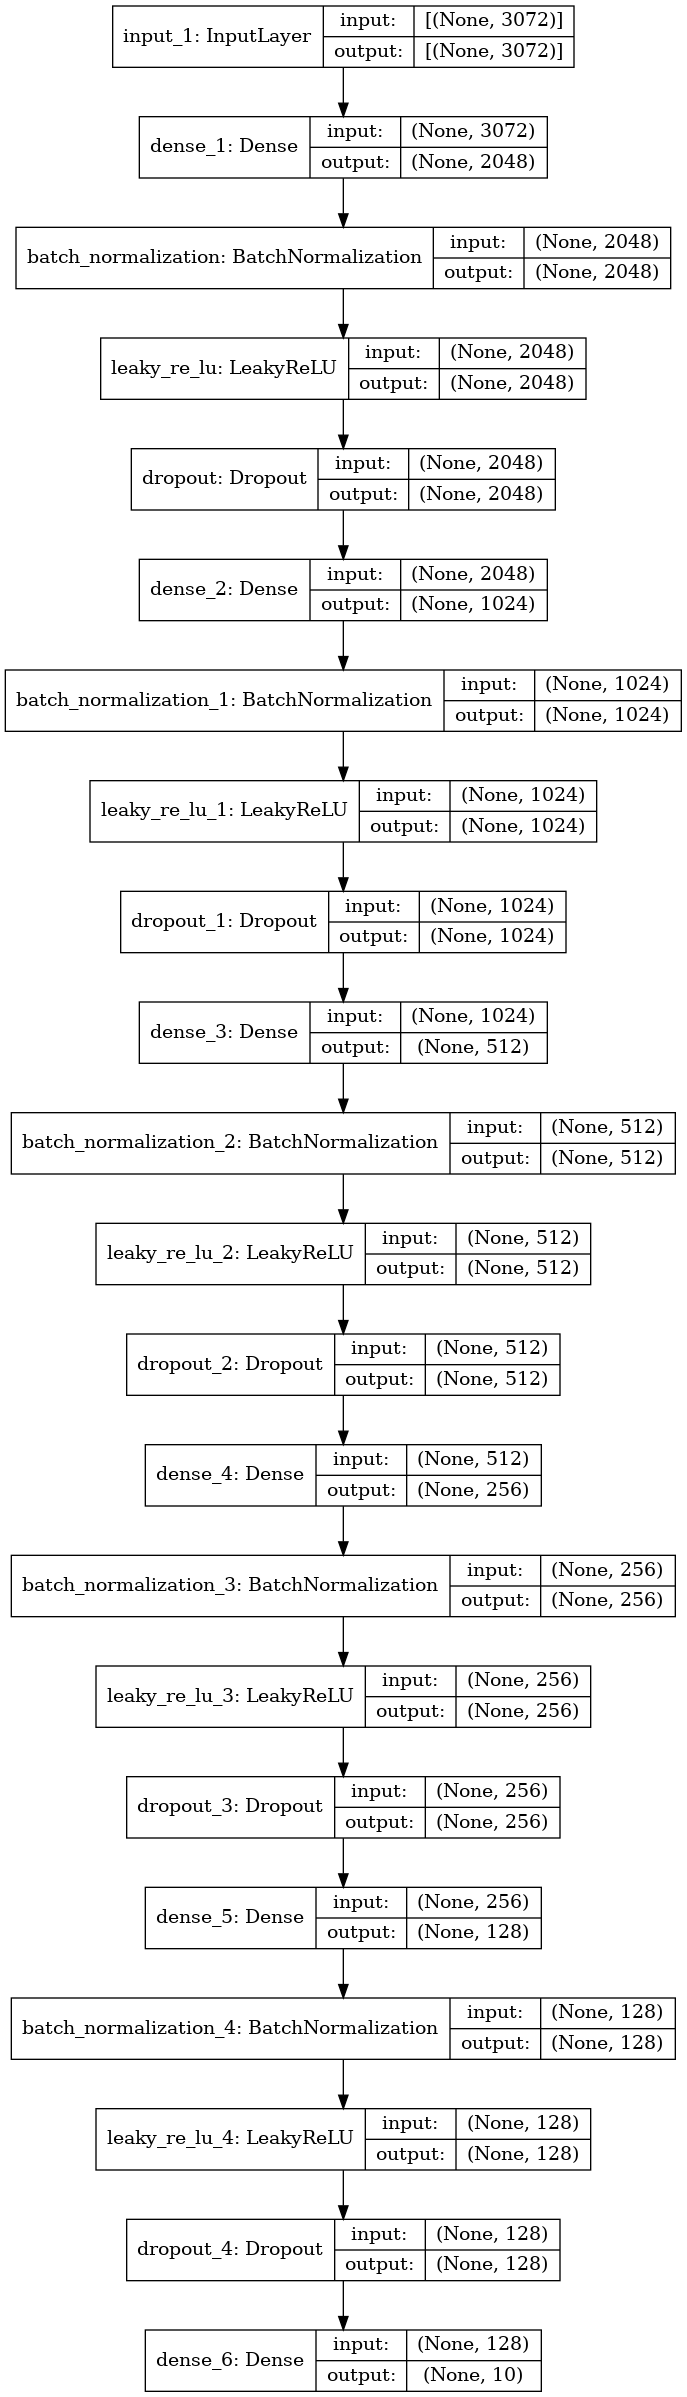

In [12]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

## 3. 모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [16]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2641 - accuracy: 0.5573 - val_loss: 1.5012 - val_accuracy: 0.4703
Epoch 2/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2418 - accuracy: 0.5702 - val_loss: 1.4360 - val_accuracy: 0.4940
Epoch 3/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2165 - accuracy: 0.5762 - val_loss: 1.4376 - val_accuracy: 0.5041
Epoch 4/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1923 - accuracy: 0.5848 - val_loss: 1.3670 - val_accuracy: 0.5214
Epoch 5/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1684 - accuracy: 0.5940 - val_loss: 1.3279 - val_accuracy: 0.5404
Epoch 6/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1448 - accuracy: 0.6009 - val_loss: 1.3431 - val_accuracy: 0.5339
Epoch 7/60
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1254 - accuracy: 0.6104 - val_loss: 1.3976 - val_accuracy:

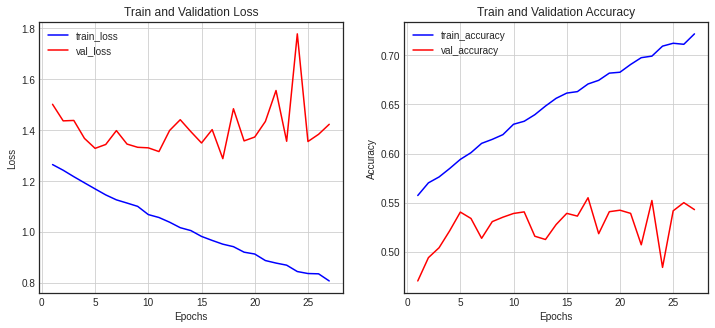

In [17]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 4. 모델 평가 및 예측

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2784 - accuracy: 0.5601


[1.2783581018447876, 0.5601000189781189]